In [1]:
import networkx as nx
import pandas as pd
import powerlaw
import matplotlib.pyplot as plt
import time
import seaborn as sns
import itertools

In [2]:
def top(d: dict) -> list:
    for key, value in sorted(d.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f'{key}: {value}')

In [3]:
# Load the graph using NetworkX
dataset_name = 'Politicians'
df = pd.read_csv('data/politician_edges.csv')
edges = [tuple(x) for x in df.to_numpy()]

# Creating the graph
G_nx = nx.Graph()
G_nx.add_edges_from(edges)

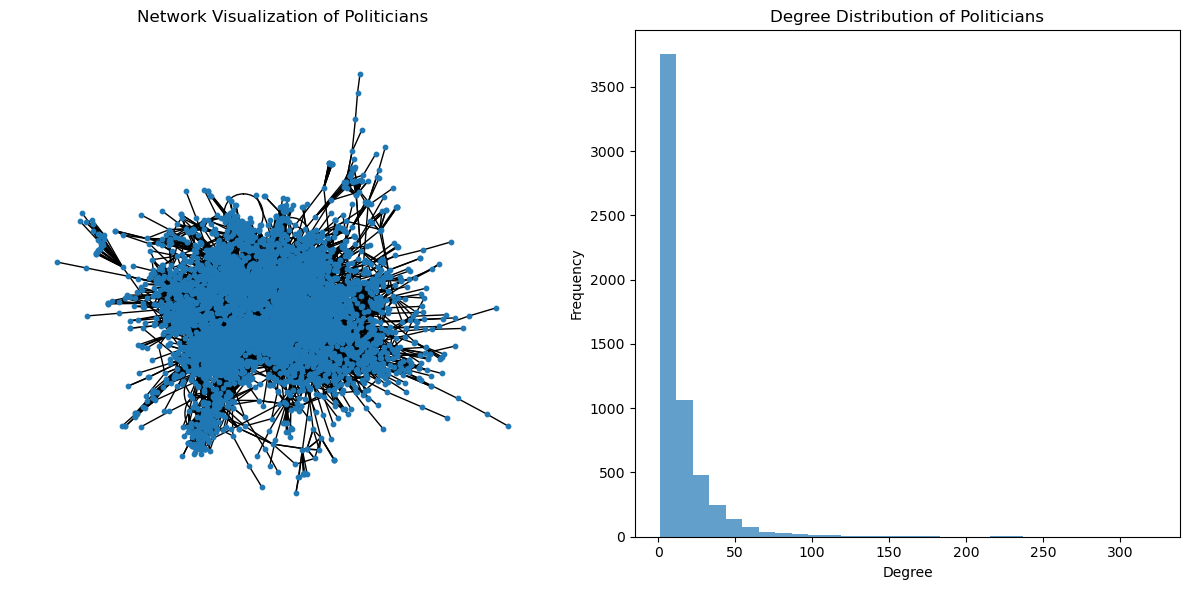

In [4]:
plt.figure(figsize=(12, 6))

# Subplot 1: Network Visualization
plt.subplot(121)
pos = nx.spring_layout(G_nx)
nx.draw(G_nx, node_size=10, pos=pos)
plt.title('Network Visualization of ' + dataset_name)

# Subplot 2: Degree Distribution
plt.subplot(122)
degrees = [d for n, d in G_nx.degree()]
plt.hist(degrees, bins=30, alpha=0.7)
plt.title('Degree Distribution of ' + dataset_name)
plt.xlabel('Degree')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

In [5]:
# Calculate network properties
degree_distr = sorted(dict(G_nx.degree()).values(), reverse=True)
fit = powerlaw.Fit(degree_distr)

print('Number of nodes:', len(G_nx.nodes()))
print('Number of edges:', len(G_nx.edges()))
print('Min degree:', min(degrees))
print('Max degree:', max(degrees))
print('Average degree:', sum(degrees) / len(degrees))
print('Estimated gamma:', fit.alpha)

Calculating best minimal value for power law fit
Number of nodes: 5908
Number of edges: 41729
Min degree: 1
Max degree: 323
Average degree: 14.126269465132024
Estimated gamma: 3.290795684436494


## Centrality

In [6]:
betweenness_centrality = nx.betweenness_centrality(G_nx)
print('Betweenness Centrality:')
top(betweenness_centrality)

Betweenness Centrality:
5800: 0.26833769782232963
1864: 0.055516710547232825
3576: 0.054119477614629694
2900: 0.04830356638479759
1324: 0.04510631854551855


In [7]:
closeness_centrality = nx.closeness_centrality(G_nx)
print('Closeness Centrality:')
top(closeness_centrality)

Closeness Centrality:
5800: 0.35884818662292695
4081: 0.3235116928637932
2059: 0.32045787446427604
4032: 0.31740999462654484
3387: 0.31247355057130766


In [8]:
degree_centrality = nx.degree_centrality(G_nx)
print('Degree Centrality:')
top(degree_centrality)

Degree Centrality:
1864: 0.05468088708312172
4874: 0.04232266802099204
5800: 0.03944472659556458
5416: 0.038767563907228714
1595: 0.037582529202640935


In [9]:
eigenvector_centrality = nx.eigenvector_centrality(G_nx)
print('Eigenvector Centrality:')
top(eigenvector_centrality)

Eigenvector Centrality:
5416: 0.17410127363429784
1595: 0.16992830963567732
4602: 0.16844123956830778
4972: 0.16026738076504243
1414: 0.15950464023278393


In [10]:
page_rank_centrality = nx.pagerank(G_nx)
print('Page Rank Centrality:')
top(page_rank_centrality)

Page Rank Centrality:
3008: 0.004847195974704059
5800: 0.004217908915371267
1864: 0.003773396203600152
4874: 0.0027301915509261726
3576: 0.002209624756444761


In [11]:
hits_centrality = nx.hits(G_nx)[0]
print('HITS Centrality:')
top(hits_centrality)

HITS Centrality:
5416: 0.011103323714214327
1595: 0.010837197331398322
4602: 0.010742217807404524
4972: 0.010220967452591751
1414: 0.010172427323554525


In [12]:
current_flow_betweenness_centrality = nx.current_flow_betweenness_centrality(G_nx)
print('Current Flow Betweenness:')
top(current_flow_betweenness_centrality)

Current Flow Betweenness:
5800: 0.12904428278365296
1864: 0.0640766070119838
4395: 0.04185929088357137
3008: 0.04052154094472177
2900: 0.04044210951772858


In [13]:
load_centrality = nx.load_centrality(G_nx)
print('Load Centrality:')
top(load_centrality)

Load Centrality:
5800: 0.2561988663228921
3576: 0.05322206158378185
1864: 0.052794731896215426
2900: 0.04944300538025831
1324: 0.042909402891755745


In [14]:
subgraph_centrality = nx.subgraph_centrality(G_nx)
print('Subgraph Centrality:')
top(subgraph_centrality)

Subgraph Centrality:
5416: 3.339292703843408e+26
1595: 3.1811375489202076e+26
4602: 3.125621539131278e+26
4972: 2.829648524496722e+26
1414: 2.8028359332908124e+26


In [15]:
harmonic_centrality = nx.harmonic_centrality(G_nx)
print('Harmonic Centrality:')
top(harmonic_centrality)

Harmonic Centrality:
5800: 2359.077380952342
4081: 2147.3920634920096
4032: 2108.2682539682023
2059: 2102.9047619047137
3576: 2101.9896825396413


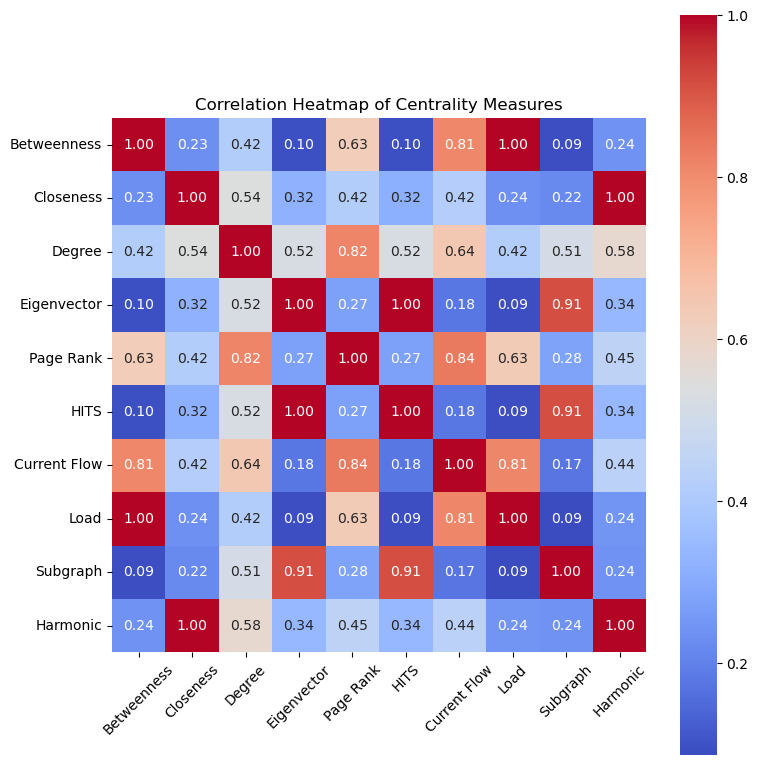

In [16]:
# Convert centrality measures to DataFrames
centrality_measures = {
    'Betweenness': betweenness_centrality,
    'Closeness': closeness_centrality,
    'Degree': degree_centrality,
    'Eigenvector': eigenvector_centrality,
    'Page Rank': page_rank_centrality,
    'HITS': hits_centrality,
    'Current Flow': current_flow_betweenness_centrality,
    'Load': load_centrality,
    'Subgraph': subgraph_centrality,
    'Harmonic': harmonic_centrality
}

# Compute correlations between centrality measures
centrality_df = pd.DataFrame(centrality_measures)
centrality_corr = centrality_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 8))
plt.title('Correlation Heatmap of Centrality Measures')
sns.heatmap(centrality_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Community Detection

In [17]:
communities = {}
modularity_values = {}
coverage_values = {}
performance_values = {}

k = 4
max_size = 4

In [18]:
communities['Bipartitions'] = nx.community.kernighan_lin_bisection(G_nx)
print('No of communities: ', len(communities['Bipartitions']))

modularity_values['Bipartitions'] = nx.community.modularity(G_nx, communities['Bipartitions'])

partition_quality = nx.community.partition_quality(G_nx, communities['Bipartitions'])
coverage_values['Bipartitions'] = partition_quality[0]
performance_values['Bipartitions'] = partition_quality[1]

No of communities:  2


In [19]:
communities['Modularity-based communities'] = nx.community.greedy_modularity_communities(G_nx)
print('No of communities: ', len(communities['Modularity-based communities']))

modularity_values['Modularity-based communities'] = nx.community.modularity(G_nx, communities['Modularity-based communities'])

partition_quality = nx.community.partition_quality(G_nx, communities['Modularity-based communities'])
coverage_values['Modularity-based communities'] = partition_quality[0]
performance_values['Modularity-based communities'] = partition_quality[1]

No of communities:  36


In [20]:
communities['Label propagation'] = nx.community.label_propagation_communities(G_nx)
print('No of communities: ', len(communities['Label propagation']))

modularity_values['Label propagation'] = nx.community.modularity(G_nx, communities['Label propagation'])

partition_quality = nx.community.partition_quality(G_nx, communities['Label propagation'])
coverage_values['Label propagation'] = partition_quality[0]
performance_values['Label propagation'] = partition_quality[1]

No of communities:  275


In [21]:
communities['Louvain Community Detection'] = nx.community.louvain_communities(G_nx)
print('No of communities: ', len(communities['Louvain Community Detection']))

modularity_values['Louvain Community Detection'] = nx.community.modularity(G_nx, communities['Louvain Community Detection'])

partition_quality = nx.community.partition_quality(G_nx, communities['Louvain Community Detection'])
coverage_values['Louvain Community Detection'] = partition_quality[0]
performance_values['Louvain Community Detection'] = partition_quality[1]

No of communities:  30


In [22]:
communities['Fluid Communities'] = list(nx.community.asyn_fluidc(G_nx, k))
print('No of communities: ', len(communities['Fluid Communities']))

modularity_values['Fluid Communities'] = nx.community.modularity(G_nx, communities['Fluid Communities'])

partition_quality = nx.community.partition_quality(G_nx, communities['Fluid Communities'])
coverage_values['Fluid Communities'] = partition_quality[0]
performance_values['Fluid Communities'] = partition_quality[1]

No of communities:  4


## Output

In [23]:
print("Output:\n")
print('Graph density:', nx.density(G_nx))
print('Clustering coefficient:', nx.average_clustering(G_nx))
print('Assortativity coefficient:', nx.degree_assortativity_coefficient(G_nx))

print("\nCorrelation between centrality measures:")
print(centrality_corr)

print("\n")
print("Modularity of Community Detection Algorithms")
print(modularity_values)
print("Coverage of Community Detection Algorithms")
print(coverage_values)
print("Performance of Community Detection Algorithms")
print(performance_values)

Output:

Graph density: 0.002391445651791438
Clustering coefficient: 0.385096125793274
Assortativity coefficient: 0.018244342767086693

Correlation between centrality measures:
              Betweenness  Closeness    Degree  Eigenvector  Page Rank  \
Betweenness      1.000000   0.231750  0.415099     0.096837   0.628347   
Closeness        0.231750   1.000000  0.540452     0.318399   0.417861   
Degree           0.415099   0.540452  1.000000     0.523769   0.817758   
Eigenvector      0.096837   0.318399  0.523769     1.000000   0.273098   
Page Rank        0.628347   0.417861  0.817758     0.273098   1.000000   
HITS             0.096714   0.318042  0.523087     0.999998   0.272827   
Current Flow     0.808805   0.421477  0.643725     0.177898   0.836925   
Load             0.999579   0.235123  0.416193     0.092844   0.633723   
Subgraph         0.091235   0.220930  0.514237     0.914848   0.281445   
Harmonic         0.240637   0.996943  0.578634     0.342893   0.445076   

        

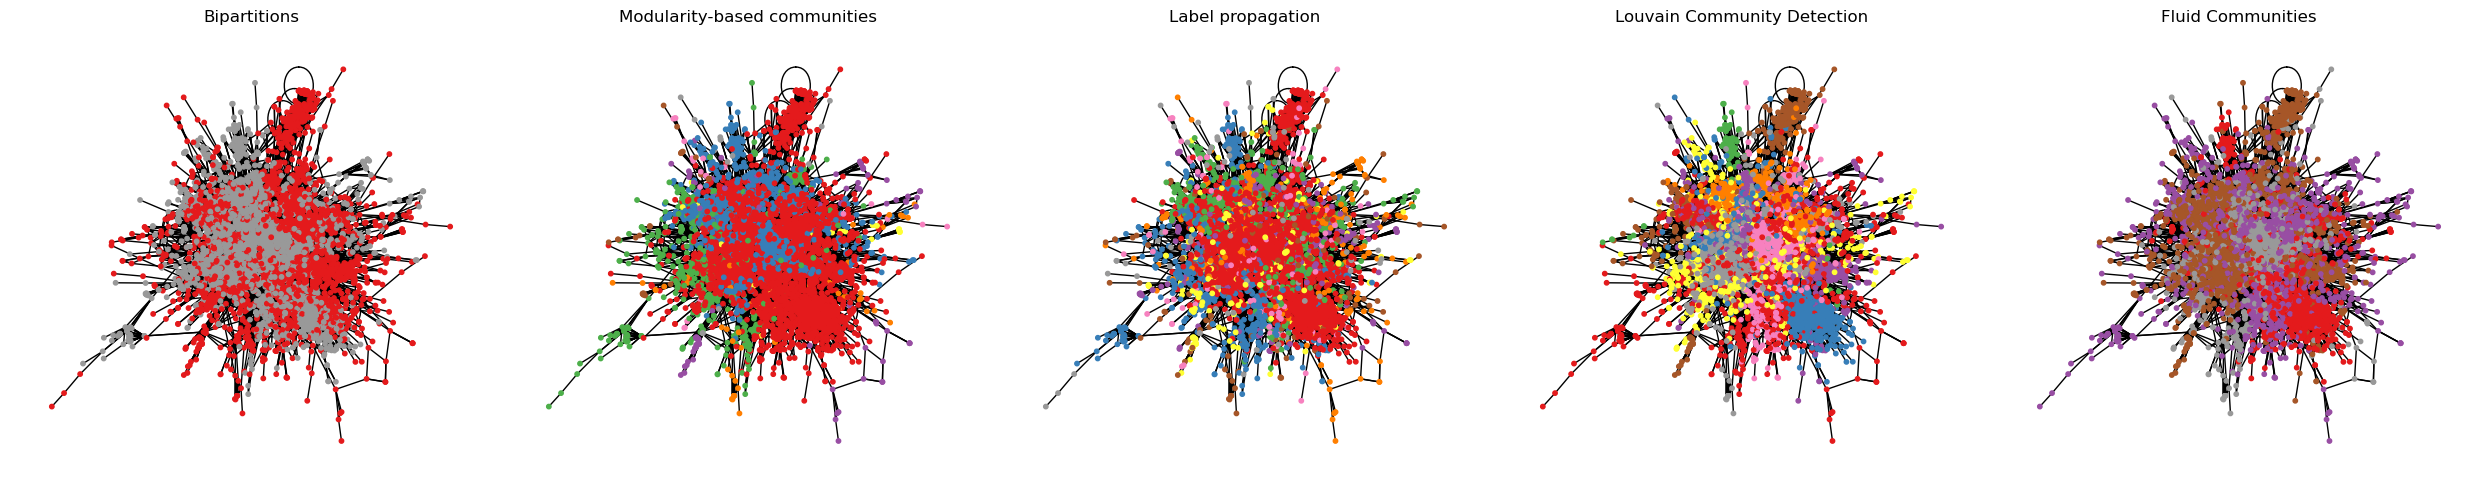

In [24]:
pos = nx.spring_layout(G_nx)
num_algorithms = len(communities)
    
fig, axes = plt.subplots(1, num_algorithms, figsize=(num_algorithms * 5, 5))

for idx, (algorithm, communities) in enumerate(communities.items()):
    ax = axes[idx] if num_algorithms > 1 else axes
    ax.set_title(algorithm)
        
    node_colors = []
    for node in G_nx.nodes:
        for community_idx, community in enumerate(communities, start=1):
            if node in community:
                node_colors.append(community_idx)
                break  # Break once the node is found in a community
        
    nx.draw(G_nx, pos, ax=ax, with_labels=False, node_size=10, node_color=node_colors, cmap=plt.cm.Set1)
    
plt.tight_layout()
plt.show()

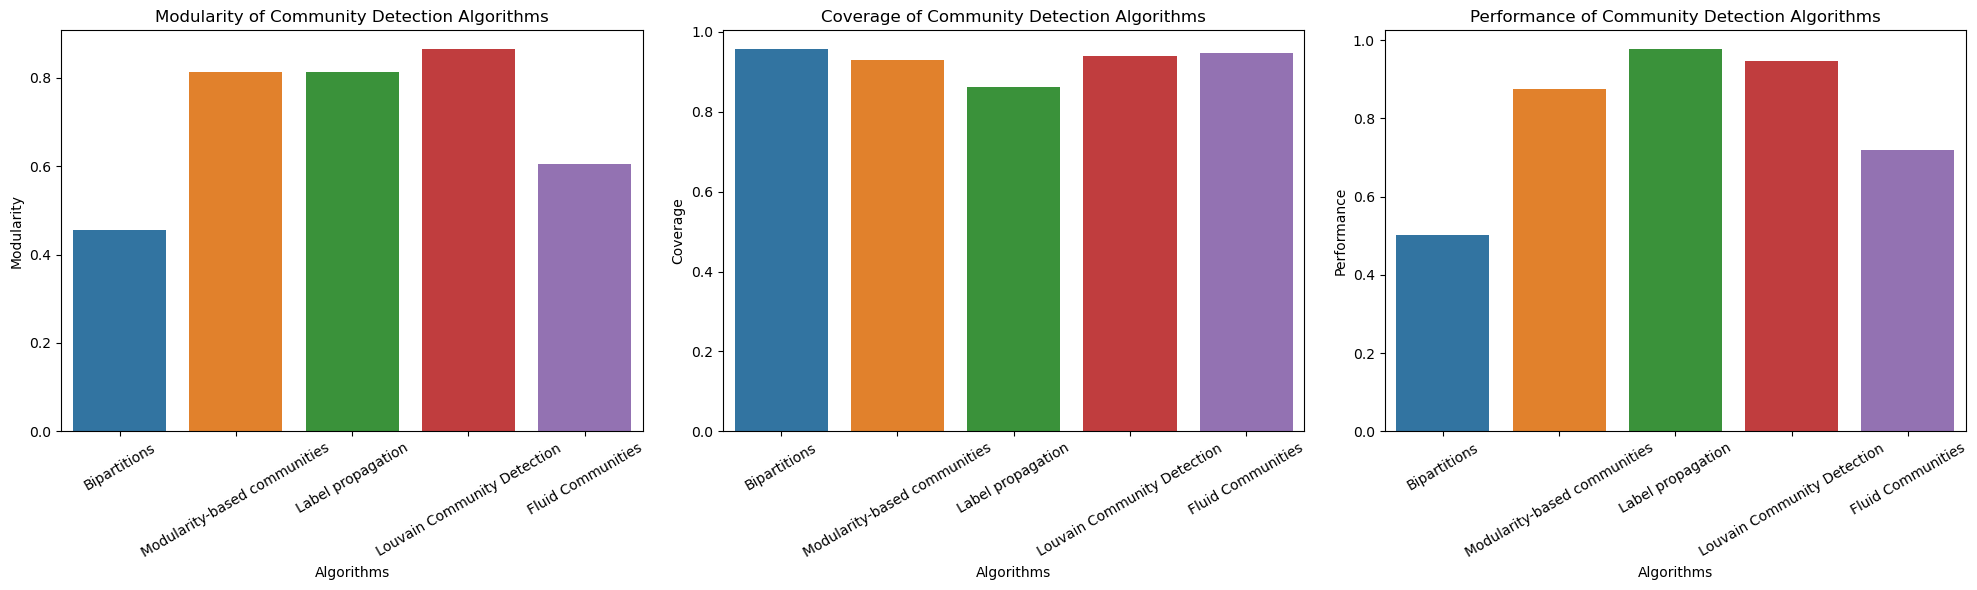

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plotting modularity values
sns.barplot(x=list(modularity_values.keys()), y=list(modularity_values.values()), ax=axes[0])
axes[0].set_title('Modularity of Community Detection Algorithms')
axes[0].set_xlabel('Algorithms')
axes[0].set_ylabel('Modularity')
axes[0].tick_params(axis='x', rotation=30)

# Plotting coverage values
sns.barplot(x=list(coverage_values.keys()), y=list(coverage_values.values()), ax=axes[1])
axes[1].set_title('Coverage of Community Detection Algorithms')
axes[1].set_xlabel('Algorithms')
axes[1].set_ylabel('Coverage')
axes[1].tick_params(axis='x', rotation=30)

# Plotting performance values
sns.barplot(x=list(performance_values.keys()), y=list(performance_values.values()), ax=axes[2])
axes[2].set_title('Performance of Community Detection Algorithms')
axes[2].set_xlabel('Algorithms')
axes[2].set_ylabel('Performance')
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()